In [1]:
%pylab inline
from itertools import izip
import os

import pandas as pd
from scipy.stats import pearsonr
from doit.tools import register_doit_as_IPython_magic

from gamtools import segregation
from gam_follow_up import config, utils, correlations
from common import plotting

Populating the interactive namespace from numpy and matplotlib


In [2]:
np.random.seed(64448)

In [3]:
seg_1np_40kb = segregation.open_segregation(
    config.in_data_raw('1np-gam-data/gamtools_output/segregation_at_40kb.passed_qc.table'))

In [4]:
seg_3np_insilico_40kb = utils.get_merged(seg_1np_40kb, 3)

In [5]:
regions = [(i, i+2) for i in range(10)]

in_silico_corr_path = config.in_data_intermediate(
    'correlations/in-silico-corr-original.npz')

if not os.path.exists(in_silico_corr_path):
    corr_1Mb = correlations.correlate_from_seg_tables(
        seg_1np_40kb, seg_3np_insilico_40kb,
        [(r1*25, r2*25) for r1, r2 in regions])

    np.savez(
        in_silico_corr_path,
        np.array(corr_1Mb))

corr_40kb_by_dist = np.load(in_silico_corr_path)['arr_0']

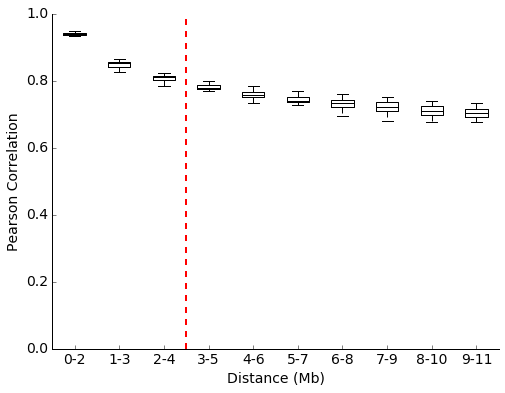

In [8]:
plt.figure(figsize=(8,6), facecolor='white')
rcParams['font.size'] = 14

_ = plt.boxplot(corr_40kb_by_dist.T, sym='',
                flierprops=dict(color='black'), boxprops=dict(color='black'),
                medianprops=dict(color='black'), whiskerprops=dict(color='black'))

plt.axvline(3.5, color='red', lw=2, ls='--')

plt.ylabel('Pearson Correlation')
plt.xticks(range(1,11), ['{}-{}'.format(r1,r2) for r1, r2 in regions])
plt.xlabel('Distance (Mb)')
plt.ylim(0,1)
plotting.simpleaxis()

plt.savefig(
    config.in_figures('fig-s1/in-silico-merged-corr-by-dist.eps'))